# Importing libraries

In [106]:
import requests
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

## Defining functions we'll be using

In [107]:
def sales(item_ID):
    URL = 'https://universalis.app/api/history/primal/' + str(item_ID)
    # print(requests.get(URL).json()['entries'])
    sale_df = pd.DataFrame.from_dict(requests.get(URL).json()['entries'])
    return sale_df
def Remove_Outlier_Indices(df): # taken from https://tinyurl.com/5ezpvxd8
    Q1 = df['pricePerUnit'].quantile(0.25)
    Q3 = df['pricePerUnit'].quantile(0.75)
    IQR = Q3 - Q1
    trueList = ~((df['pricePerUnit'] < (Q1 - 1.5 * IQR)) |(df['pricePerUnit'] > (Q3 + 1.5 * IQR)))
    return trueList

In [108]:
Hi = input("Enter item ID: ")
df = sales(Hi)
df

,hq,pricePerUnit,quantity,timestamp,worldName,worldID
0,False,750,5,1633197609,Excalibur,93
1,False,700,1,1633197605,Excalibur,93
2,False,679,1,1633197603,Excalibur,93
3,False,600,1,1633197601,Excalibur,93
4,False,500,1,1633197599,Excalibur,93
...,...,...,...,...,...,...
1795,False,300,99,1628218915,Hyperion,95
1796,False,250,99,1628208516,Behemoth,78
1797,True,2000,10,1628182662,Famfrit,35
1798,True,2000,10,1628182660,Famfrit,35


In [109]:
df_PPU = Remove_Outlier_Indices(df)
dfSubset = df[df_PPU]
# dfSubset.describe()
dfSubset

,hq,pricePerUnit,quantity,timestamp,worldName,worldID
0,False,750,5,1633197609,Excalibur,93
1,False,700,1,1633197605,Excalibur,93
2,False,679,1,1633197603,Excalibur,93
3,False,600,1,1633197601,Excalibur,93
4,False,500,1,1633197599,Excalibur,93
...,...,...,...,...,...,...
1792,True,180,2,1628234709,Behemoth,78
1793,True,505,22,1628228456,Ultros,77
1794,False,492,59,1628228340,Ultros,77
1795,False,300,99,1628218915,Hyperion,95


We can assume each server having their own market. Thus, it's difficult to correlate their data with each other.

<AxesSubplot:>

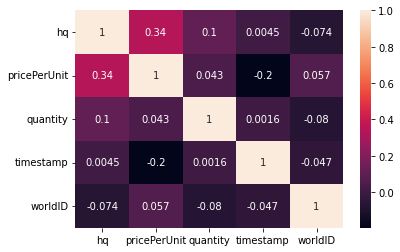

In [110]:
sns.heatmap(df.corr(),annot=True)

# Boxplot of NQ/HQ and price

<AxesSubplot:xlabel='hq', ylabel='pricePerUnit'>

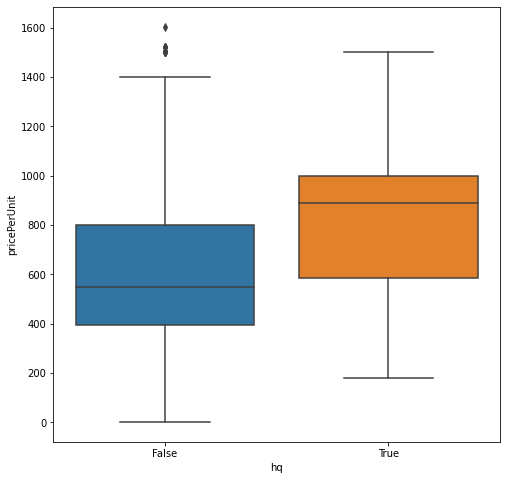

In [111]:
plt.figure(figsize=(8,8))
sns.boxplot(x='hq',y='pricePerUnit',data=dfSubset)
# sns.boxplot(x='hq',y='pricePerUnit',data=df)

## The graph above should give us in-depth view about the difference of prices between HQ and NQ items